In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms

from papercolors import colordict as pcd
import papercolors as pc
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}
paper_path = Path('../figures/')

In [2]:
def tau(xi):
    return xi, np.cos(xi), np.sin(xi)

In [339]:
def plot_tau(axt, celltext, fields, colors, scale = (.75, 2.25), bbox=None, show=True):
    table = axt.table(celltext, rowLabels=fields, bbox=bbox, cellLoc='center')
    for i, field in enumerate(fields):
        table[i, -1].get_text().set_color(pcd['fiber'])
        table[i, -1].set_edgecolor(pcd['section'])
        table[i, 0].get_text().set_color(colors.get(field, 'k'))
        table[i, 0].set_edgecolor(pcd['section'])
        if not show:
            table[i,-1].set_visible(False)
      
    axt.axis('off')
    #table.auto_set_font_size(False)
    #table.set_fontsize(fs['footnote']-1)
    #table.scale(*scale)
    return table

In [394]:
def make_figs(fig1, fig2, arrow_angle=15.5):
    axd1 = fig1.subplot_mosaic([['tau', 'mu', 'rho'],['k', 'xi', 's']], height_ratios=[2,1])
    axd2 = fig2.subplot_mosaic([['tau', 'mu', 'rho'],['k', 'xi', 's']], height_ratios=[2,1])
    
    colors = {'i':'tab:olive','sin':'tab:blue', 'cos':'tab:orange'}
    
    i = 7*np.pi/4
    i, cos, sin = tau(i)
    
    istr = r"7\pi/4"
    
    celltext =[[f"$\cos({istr})$"], [f"$\sin({istr})$"]]
    fields = ["cos", "sin"]
    
    tau1 = plot_tau(axd1['tau'], celltext, fields, colors, bbox=[0, 0, .8, 1])
    
    celltext.extend([[r"$\mathrm{C}$"], [r'$\mathrm{C}$']])
    fields.extend(['color', 'mark'])
    colors.update({'color': colors['i'], 'mark':'k'}) 
    
    tau2 = plot_tau(axd2['tau'], celltext, fields, colors, bbox=[0, 0, .8, 1])
    
    celltext =[[f"{cos:.2f}", ], [f"{sin:.2f}"]]
    fields = [" x ", " y "]
    colors.update({' x ':colors['cos'], ' y ':colors['sin']})
    mu1 = plot_tau(axd1['mu'], celltext, fields, colors, scale=(.5, 2.25), bbox=[0, 0, .8, 1], show=False)
    
    celltext.extend([[colors['i']], [r'line']])
    fields.extend(['color', 'mark'])
    colors.update({'color': colors['i'], 'mark':'k'})    
    mu2 = plot_tau(axd2['mu'], celltext, fields, colors, scale=(.75, 2.25), bbox=[0, 0, .8, 1], show=False)
    
    x = np.linspace(0, 2 * np.pi, 50)
    xsub = np.linspace(i-np.pi/300, i, int(i * 25 / np.pi))
    alpha = .15
    t = np.linspace(0, 2*np.pi, 1000)
    
    arrowprops_xi=dict(color=pcd['functor'], arrowstyle="->", lw=1)
    arrowprops_sec=dict(arrowstyle="->", color=pcd['section'], lw=.75)
    
    for sfig, axd, tab1, tab2 in [(fig1, axd1, tau1, mu1), (fig2, axd2, tau2, mu2)]:
        axd['rho']
        circ_shadow, = axd['rho'].plot(tau(x)[1], tau(x)[2], lw=5,  color=colors.get('i', 'C5'), alpha=.15)
        circ, = axd['rho'].plot(tau(xsub)[1], tau(xsub)[2], lw=5,  color=colors.get('i', 'C5'))
        axd['rho'].set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2),aspect='equal')
        axd['rho'].axis('off')
    
    
        k, = axd['k'].plot(tau(t)[1]*.5, tau(t)[2]*.5, color=pcd['base'], lw=2)
        axd['k'].set_aspect('equal')
        axd['k'].axis('off')
        axd['k'].set(xlim=(-1, 1 ), ylim=(-1, 1))
        axd['k'].annotate(r"$K$", (.5, -.1), xycoords=k, color=pcd['base'], va='top', ha='center')
    
    
        s0 = mpatches.Annulus((0, 0), r=1, width=.5, edgecolor=pcd['base'], facecolor=pc.lighten(pcd['base'], .1))
        axd['s'].add_patch(s0)
        axd['s'].set_aspect('equal')
        axd['s'].axis('off')
        axd['s'].annotate(r"$S$", (.5, -.1), xycoords=s0, color=pcd['base'], va='top', ha='center')
        axd['s'].set(xlim=(-1.1,1.1), ylim=(-1.1,1.1))
    
        axd['xi'].axis('off')
    
        k1, = axd['k'].plot(tau(i)[1]*.5, tau(i)[2]*.5, marker='o', markersize=4, color=pcd['functor'])
        s0, = axd['s'].plot((tau(i)[1]*.5, tau(i)[1]), (tau(i)[2]*.5, tau(i)[2]), color=pcd['functor'], lw=3)
    
    
        xs = s0.get_xdata()
        ys = s0.get_ydata()
        mid = lambda p: np.min(p) + np.abs(p[0]-p[1])/2
        xm, ym = mid(xs), mid(ys)
        pad = np.pi/20
        xi_s0 = mpatches.ConnectionPatch(xyA = (xm, ym), xyB = (cos*.5, sin*.5), 
                                        coordsA=axd['s'].transData, axesA=axd['s'], 
                                        coordsB = axd['k'].transData, axesB = axd['k'].transData,
                                        **arrowprops_xi, zorder=2)
        sfig.add_artist(xi_s0)
        xi_s0_lab = mtext.Annotation(r"$\xi$", xy=(.4, .5), xycoords=xi_s0, va='center', ha='center', 
             color=pcd['functor'], fontsize=fs['normal']+4, bbox=dict(facecolor='white', edgecolor='none'))
        sfig.add_artist(xi_s0_lab)
    
    
        tarr = mpatches.ConnectionPatch(xyA = (tau(i)[1]*.5, tau(i)[2]*.5), xyB = (.5, 0), 
                                       coordsA = axd['k'].transData, axesA=axd['k'], coordsB = axd['tau'].transAxes, axesB=axd['tau'], 
                                       **arrowprops_sec)
        sfig.add_artist(tarr)
        tarr_lab = mtext.Annotation(r"$\tau$", (.25, .75), xycoords=tarr, ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
        fig.add_artist(tarr_lab)
    
        marr = mpatches.ConnectionPatch(xyA = (tau(i)[1]*.5, tau(i)[2]*.5), xyB = (.5, 0), 
                                       coordsA = axd['k'].transData, axesA=axd['k'], coordsB = axd['mu'].transAxes, axesB=axd['mu'], 
                                       **arrowprops_sec)
        sfig.add_artist(marr)
        marr_lab = mtext.Annotation(r"$\mu$", (.6, .75), xycoords=marr, ha='right', va='center', color=pcd['section'], fontsize=fs['normal']-1)
        sfig.add_artist(marr_lab)
        
        
        rarr = mpatches.ConnectionPatch(xyA = (xm, ym), xyB = (tau(i)[1], tau(i)[2]), 
                                       coordsA = axd['s'].transData, axesA=axd['s'], coordsB = axd['rho'].transData, axesB=axd['rho'], 
                                       **arrowprops_sec)
        fig.add_artist(rarr)
        rarr_lab = mtext.Annotation(r"$\rho|_{\xi^{-1}}$", (1, .5), xycoords=rarr, ha='left', va='center', color=pcd['section'], fontsize=fs['normal']-1)
        sfig.add_artist(rarr_lab)
    
    arrowprops_art=dict(arrowstyle="->", color=pcd['artist'], lw=1.5, mutation_scale=15)
    
    
    for sfig, axd, fields in [(fig1, axd1, fields[:-2]), (fig2, axd2, fields)]:
        height = 1/len(fields)
        for i, field in enumerate(fields[::-1]):
            ls = ':' if field in ['color', 'mark'] else '-'
            y = height*(i+.5)
            nu = mpatches.ConnectionPatch(xyA=(.85, y), xyB=(0, y), coordsA=axd['tau'].transAxes, coordsB = axd['mu'].transAxes, axesA=axd['tau'], axesB = axd['mu'], **arrowprops_art, ls=ls)
            sfig.add_artist(nu)
            nu_lab = mtext.Annotation(f"{field}" + r"$:\nu$", xy=(.4, 1), xycoords=nu, va='bottom', ha='center', 
                               color=pcd['artist'], fontsize=fs['normal']-2, zorder=-2)
            sfig.add_artist(nu_lab)
    
    arrowprops_art=dict(arrowstyle=f"]->, widthA=2.5, lengthA=1,angleA={arrow_angle}", color=pcd['artist'], lw=2, mutation_scale=15)
    
    for sfig, axd, lab in [[fig1, axd1, r"$Q_{green, line}$"], [fig2, axd2, r"$Q$"]]:
        q = mpatches.ConnectionPatch(xyA=(.85, .5), xyB=(cos, sin), 
                                     coordsA=axd['mu'].transAxes, coordsB = axd['rho'].transData, 
                                     axesA=axd['mu'], axesB = axd['rho'], **arrowprops_art, ls=ls)
        sfig.add_artist(q)
        q_lab = mtext.Annotation(lab, xy=(.65, .45), xycoords=q, va='bottom', ha='center', 
                               color=pcd['artist'], fontsize=fs['normal'], zorder=-2)
        sfig.add_artist(q_lab)


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\story\AppData\Local\Temp\ipykernel_4236\3669498649.py:12: SyntaxWarning: invalid escape sequence '\c'
  celltext =[[f"$\cos({istr})$"], [f"$\sin({istr})$"]]
C:\Users\story\AppData\Local\Temp\ipykernel_4236\3669498649.py:12: SyntaxWarning: invalid escape sequence '\s'
  celltext =[[f"$\cos({istr})$"], [f"$\sin({istr})$"]]


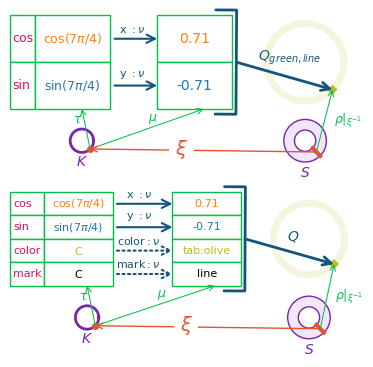

In [395]:
fig = plt.figure(figsize=(3.5, 3.5), layout='constrained')
fig1, fig2 =  fig.subfigures(2, 1, height_ratios=[1, 1])
make_figs(fig1, fig2)
fig.savefig(paper_path/"construction.pdf", bbox_inches='tight', dpi=300)

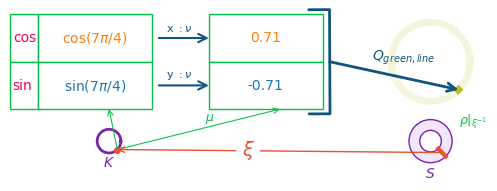

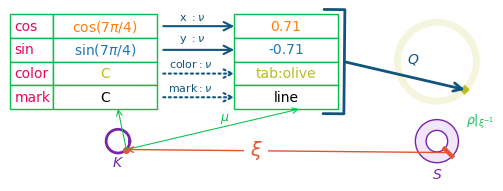

In [400]:
fig1 = plt.figure(figsize=(5, 1.75), layout='constrained')
fig2 = plt.figure(figsize=(5, 1.75), layout='constrained')
make_figs(fig1, fig2, arrow_angle=12.5)
fig1.savefig(paper_path/"construction_nocomp.pdf",  bbox_inches='tight', dpi=300)
fig2.savefig(paper_path/"construction_comp.pdf",  bbox_inches='tight', dpi=300)